In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [4]:
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [5]:
fish_target = df.loc[cond, ['Species']]

In [9]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [16]:
from sklearn.model_selection import train_test_split # ()에 들어가는 인자가 같은 형태여야함

In [35]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
# stratify= 기준에따라 비율을 정해 분류 random_state= 랜덤하게 셔플을 고정값을 넣어줌

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kn = KNeighborsClassifier()

In [40]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [41]:
kn.score(test_input, test_target)

1.0

In [45]:
kn.predict([[25, 150]])

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [47]:
import matplotlib.pyplot as plt

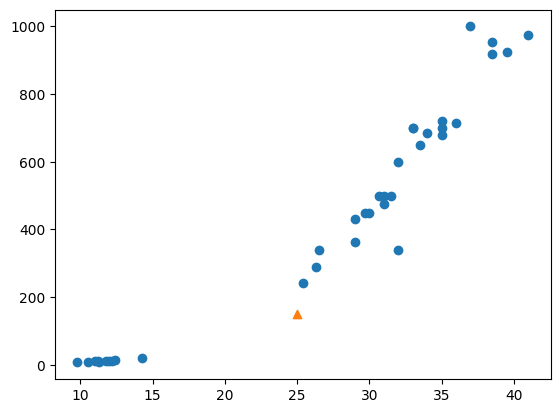

In [49]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show()

In [52]:
distance, indexes = kn.kneighbors([[25, 150]]) #근접한 이웃 5개 목록, 거리 출력

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [53]:
indexes

array([[11, 20, 13, 22, 15]])

In [55]:
n_df = train_input.iloc[indexes[0]]

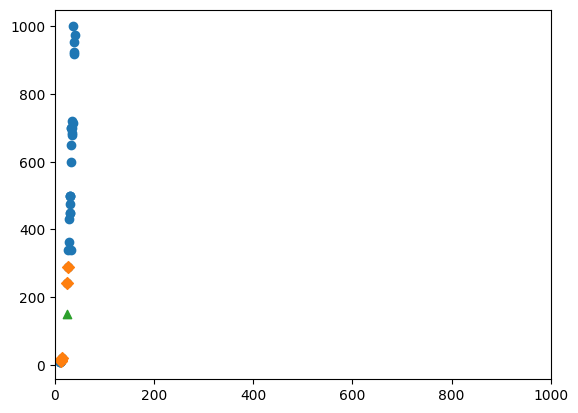

In [58]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000) 
plt.show()

- 표준 점수

표준점수 평균과 얼마나 떨어진 점수인지 측정 (왼쪽,오른쪽 치우쳐진 기준에 따라 다름)

```
(데이터 - 평균)/표준편차
```


In [61]:
mean = train_input.mean()

In [62]:
std = train_input.std()

In [63]:
train_input.head()

,Length2,Weight
26,35.0,720.0
3,29.0,363.0
150,11.3,8.7
9,30.7,500.0
149,11.2,9.8


In [64]:
(train_input - mean).head()

,Length2,Weight
26,8.066667,278.016667
3,2.066667,-78.983333
150,-15.633333,-433.283333
9,3.766667,58.016667
149,-15.733333,-432.183333


In [66]:
train_scaled = ((train_input - mean) / std)

In [67]:
new = ([25, 150] - mean) / std
new

Length2   -0.188902
Weight    -0.884177
dtype: float64

In [68]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [69]:
test_scaled = ((test_input - mean) / std)

In [70]:
kn.score(test_scaled, test_target)

1.0

In [71]:
kn.predict([new])

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [72]:
import seaborn as sns
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [74]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [107]:
adelie_df = df[df['species'] == 'Adelie']
adelie_df.mean(numeric_only=True)

bill_length_mm         38.791391
bill_depth_mm          18.346358
flipper_length_mm     189.953642
body_mass_g          3700.662252
dtype: float64

In [100]:
chin_df = df[df['species'] == 'Chinstrap']
chin_df.mean(numeric_only=True)

bill_length_mm         48.833824
bill_depth_mm          18.420588
flipper_length_mm     195.823529
body_mass_g          3733.088235
dtype: float64

In [103]:
gen_df = df[df['species'] == 'Gentoo']
gen_df.mean(numeric_only=True)

bill_length_mm         47.504878
bill_depth_mm          14.982114
flipper_length_mm     217.186992
body_mass_g          5076.016260
dtype: float64

In [181]:
df = df.dropna()

In [239]:
cond = df['species'].isin(['Adelie', 'Gentoo'])

In [240]:
penguin_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]

In [241]:
penguin_target = df.loc[cond, ['species']]

In [242]:
train_input, test_input, train_target, test_target = train_test_split(penguin_data, penguin_target, stratify=penguin_target, random_state=42)

In [246]:
distance, indexes = kn.kneighbors([[16, 4250]])
indexes

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ 18, 163,  93,  78, 168]])

In [247]:
n_df = train_input.iloc[indexes[0]]

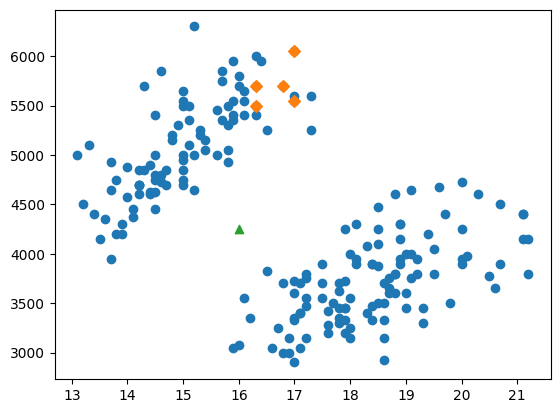

In [248]:
plt.scatter(train_input['bill_depth_mm'], train_input['body_mass_g'])
plt.scatter(n_df['bill_depth_mm'], n_df['body_mass_g'], marker='D')
plt.scatter(16, 4250, marker='^')
plt.show()

In [249]:
mean = train_input.mean()

In [250]:
std = train_input.std()

In [251]:
train_scaled = ((train_input - mean) / std)

In [252]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [253]:
test_scaled = ((test_input - mean) / std)

In [254]:
kn.score(test_scaled, test_target['species'])

1.0

In [258]:
new = ([16, 4250] - mean) / std
new

bill_depth_mm   -0.439067
body_mass_g     -0.104600
dtype: float64

In [259]:
kn.predict([new])

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

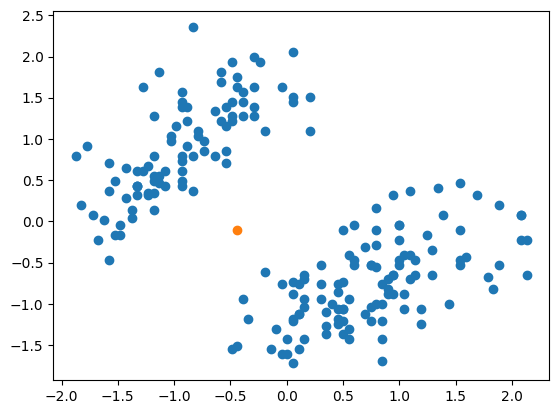

In [260]:
plt.scatter(train_scaled['bill_depth_mm'], train_scaled['body_mass_g'])
plt.scatter(new['bill_depth_mm'], new['body_mass_g'])
plt.show()